<a href="https://colab.research.google.com/github/ronnie-allen/agri-api/blob/main/Visualization_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install matplotlib pandas


Location: Civil Aerodrome, Coimbatore District, Tamil Nadu
Latitude: 11.04887, Longitude: 77.03858


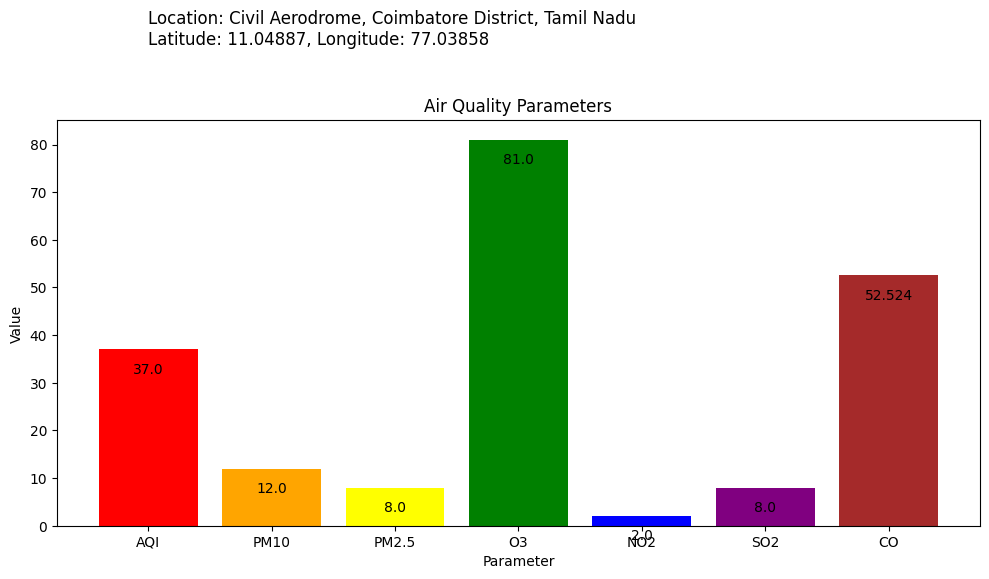

In [ ]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

# Replace with your actual API keys
weatherbit_api_key = '64efca388d274fad847198f295f68b0c'
opencage_api_key = 'e2077ef4c9ee401ebaf345be209f68c0'

# Define the coordinates
latitude = 11.04887  # Example latitude
longitude = 77.03858  # Example longitude

# Construct the Weatherbit API URL
weatherbit_url = f'https://api.weatherbit.io/v2.0/current/airquality?lat={latitude}&lon={longitude}&key={weatherbit_api_key}'

# Make a request to the Weatherbit API
weatherbit_response = requests.get(weatherbit_url)

# Check if the request was successful
if weatherbit_response.status_code == 200:
    # Parse the JSON response
    air_quality_data = weatherbit_response.json()
    # Extract relevant air quality details
    air_quality = air_quality_data['data'][0]
    aqi = air_quality['aqi']
    pm10 = air_quality['pm10']
    pm25 = air_quality['pm25']
    o3 = air_quality['o3']
    no2 = air_quality['no2']
    so2 = air_quality['so2']
    co = air_quality['co']

    # Construct the Reverse Geocoding API URL
    reverse_geocoding_url = f'https://api.opencagedata.com/geocode/v1/json?q={latitude}+{longitude}&key={opencage_api_key}'

    # Make a request to the OpenCage Reverse Geocoding API
    reverse_geocoding_response = requests.get(reverse_geocoding_url)

    # Check if the request was successful
    if reverse_geocoding_response.status_code == 200:
        # Parse the JSON response
        reverse_geocoding_data = reverse_geocoding_response.json()
        if reverse_geocoding_data['results']:
            # Get the components of the first result
            components = reverse_geocoding_data['results'][0]['components']
            state = components.get('state', 'N/A')
            district = components.get('state_district', 'N/A')
            taluk = components.get('suburb', 'N/A')

            # Print the air quality details along with the location
            print(f"Location: {taluk}, {district}, {state}")
            print(f"Latitude: {latitude}, Longitude: {longitude}")

            # Create a pandas DataFrame for tabular data
            data = {
                'Parameter': ['AQI', 'PM10', 'PM2.5', 'O3', 'NO2', 'SO2', 'CO'],
                'Value': [aqi, pm10, pm25, o3, no2, so2, co]
            }
            df = pd.DataFrame(data)

            # Plotting the data with color variation based on values
            plt.figure(figsize=(10, 6))
            bars = plt.bar(df['Parameter'], df['Value'], color=['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown'])
            plt.xlabel('Parameter')
            plt.ylabel('Value')
            plt.title('Air Quality Parameters')

            # Add text annotations for the values on top of each bar
            for bar, value in zip(bars, df['Value']):
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{value}', ha='center', color='black', fontsize=10)

            # Display location information on top of the plot
            plt.text(0, max(df['Value']) + 20, f"Location: {taluk}, {district}, {state}\nLatitude: {latitude}, Longitude: {longitude}", fontsize=12, ha='left')

            # Show plot
            plt.tight_layout()
            plt.show()

        else:
            print("Error: No results found for the specified coordinates.")
    else:
        print(f"Error: Unable to fetch reverse geocoding data (Status code: {reverse_geocoding_response.status_code})")
else:
    print(f"Error: Unable to fetch air quality data (Status code: {weatherbit_response.status_code})")


                              Metric    Value Unit
0          Water Level (Temperature)    14.91   °C
1      Lowest Value Point (Humidity)    76.00    %
2  Potential Action Point (Pressure)  1010.00  hPa


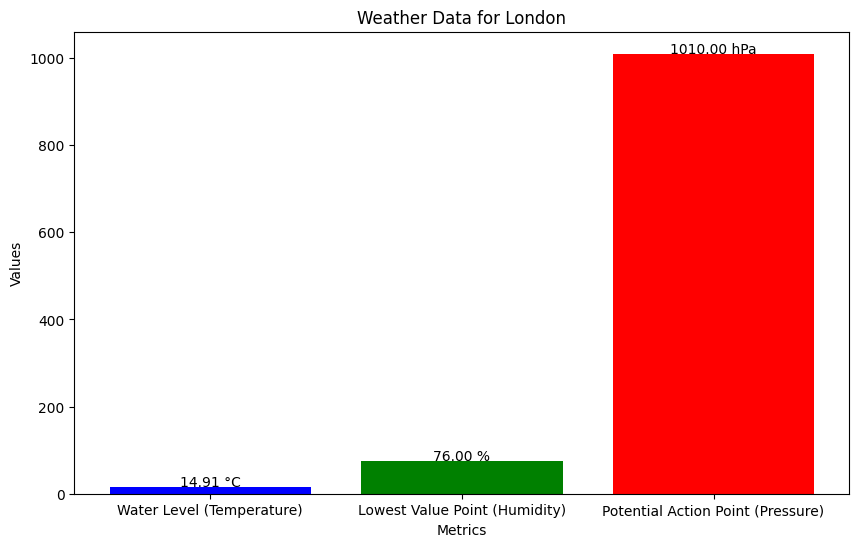

In [16]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Your OpenWeather API key
api_key = "fa4f706105a3478dfdf1d950ee3b302b"

# Example URL of the OpenWeather API endpoint for current weather data
city = "London"
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}"

# Making a GET request to the API endpoint
response = requests.get(url)

# Checking if the request was successful
if response.status_code == 200:
    # Parsing the response JSON
    data = response.json()

    # Extracting specific data from the JSON response
    water_level = data['main']['temp']  # Temperature in Kelvin
    lvp = data['main']['humidity']      # Humidity in %
    pap = data['main']['pressure']      # Pressure in hPa

    # Converting temperature from Kelvin to Celsius
    temperature_celsius = water_level - 273.15

    # Creating a DataFrame with the extracted data
    df = pd.DataFrame({
        'Metric': ['Water Level (Temperature)', 'Lowest Value Point (Humidity)', 'Potential Action Point (Pressure)'],
        'Value': [temperature_celsius, lvp, pap],
        'Unit': ['°C', '%', 'hPa']
    })

    print(df)

    # Plotting the data using matplotlib
    fig, ax = plt.subplots(figsize=(10, 6))

    # Creating a bar chart
    ax.bar(df['Metric'], df['Value'], color=['blue', 'green', 'red'])

    # Adding labels and title
    for index, value in enumerate(df['Value']):
        ax.text(index, value + 1, f'{value:.2f} {df["Unit"][index]}', ha='center')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Values')
    ax.set_title(f'Weather Data for {city}')

    plt.show()
else:
    print(f"Failed to retrieve data: {response.status_code}")

Location: Civil Aerodrome, Coimbatore District, Tamil Nadu
Latitude: 11.04887, Longitude: 77.03858
Air Quality Index (AQI): 37
PM10: 12 µg/m³
PM2.5: 8 µg/m³
O3: 81 ppb
NO2: 2 ppb
SO2: 8 ppb
CO: 52.524 ppb


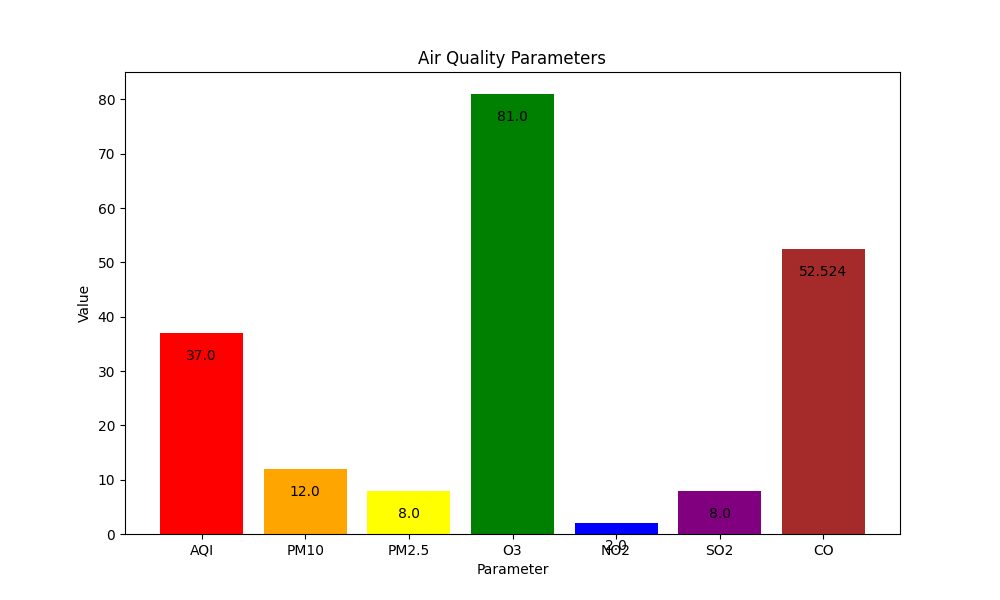

In [15]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import folium
from IPython.display import display, Image

# Replace with your actual API keys
weatherbit_api_key = '64efca388d274fad847198f295f68b0c'
opencage_api_key = 'e2077ef4c9ee401ebaf345be209f68c0'

# Define the coordinates
latitude = 11.04887  # Example latitude
longitude = 77.03858  # Example longitude

# Construct the Weatherbit API URL
weatherbit_url = f'https://api.weatherbit.io/v2.0/current/airquality?lat={latitude}&lon={longitude}&key={weatherbit_api_key}'

# Make a request to the Weatherbit API
weatherbit_response = requests.get(weatherbit_url)

# Check if the request was successful
if weatherbit_response.status_code == 200:
    # Parse the JSON response
    air_quality_data = weatherbit_response.json()
    # Extract relevant air quality details
    air_quality = air_quality_data['data'][0]
    aqi = air_quality['aqi']
    pm10 = air_quality['pm10']
    pm25 = air_quality['pm25']
    o3 = air_quality['o3']
    no2 = air_quality['no2']
    so2 = air_quality['so2']
    co = air_quality['co']

    # Construct the Reverse Geocoding API URL
    reverse_geocoding_url = f'https://api.opencagedata.com/geocode/v1/json?q={latitude}+{longitude}&key={opencage_api_key}'

    # Make a request to the OpenCage Reverse Geocoding API
    reverse_geocoding_response = requests.get(reverse_geocoding_url)

    # Check if the request was successful
    if reverse_geocoding_response.status_code == 200:
        # Parse the JSON response
        reverse_geocoding_data = reverse_geocoding_response.json()
        if reverse_geocoding_data['results']:
            # Get the components of the first result
            components = reverse_geocoding_data['results'][0]['components']
            state = components.get('state', 'N/A')
            district = components.get('state_district', 'N/A')
            taluk = components.get('suburb', 'N/A')
            location_name = f"{taluk}, {district}, {state}"

            # Print the air quality details along with the location
            print(f"Location: {location_name}")
            print(f"Latitude: {latitude}, Longitude: {longitude}")
            print(f"Air Quality Index (AQI): {aqi}")
            print(f"PM10: {pm10} µg/m³")
            print(f"PM2.5: {pm25} µg/m³")
            print(f"O3: {o3} ppb")
            print(f"NO2: {no2} ppb")
            print(f"SO2: {so2} ppb")
            print(f"CO: {co} ppb")

            # Create a pandas DataFrame for tabular data
            data = {
                'Parameter': ['AQI', 'PM10', 'PM2.5', 'O3', 'NO2', 'SO2', 'CO'],
                'Value': [aqi, pm10, pm25, o3, no2, so2, co]
            }
            df = pd.DataFrame(data)

            # Plotting the data with color variation based on values
            plt.figure(figsize=(10, 6))
            bars = plt.bar(df['Parameter'], df['Value'], color=['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'brown'])
            plt.xlabel('Parameter')
            plt.ylabel('Value')
            plt.title('Air Quality Parameters')

            # Add text annotations for the values on top of each bar
            for bar, value in zip(bars, df['Value']):
                plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{value}', ha='center', color='black', fontsize=10)

            # Save the plot as an image file
            plot_file = '/tmp/air_quality_plot.png'  # Modify the path as needed
            plt.savefig(plot_file)

            # Close the plot to prevent it from displaying again
            plt.close()

            # Create a map centered around the specified coordinates
            map_location = folium.Map(location=[latitude, longitude], zoom_start=10)

            # Add a marker for the specified location
            folium.Marker([latitude, longitude], popup=location_name).add_to(map_location)

            # Display the map and the saved plot together
            display(Image(filename=plot_file))
            display(map_location)

        else:
            print("Error: No results found for the specified coordinates.")
    else:
        print(f"Error: Unable to fetch reverse geocoding data (Status code: {reverse_geocoding_response.status_code})")
else:
    print(f"Error: Unable to fetch air quality data (Status code: {weatherbit_response.status_code})")


Data retrieved successfully:
  Pollutant   Value   Unit
0      PM10  30.808  µg/m³
1     PM2.5   0.000  µg/m³
2        O3   0.000    ppb
3       NO2   4.270    ppb
4       SO2   4.347    ppb
5        CO   0.366    ppb


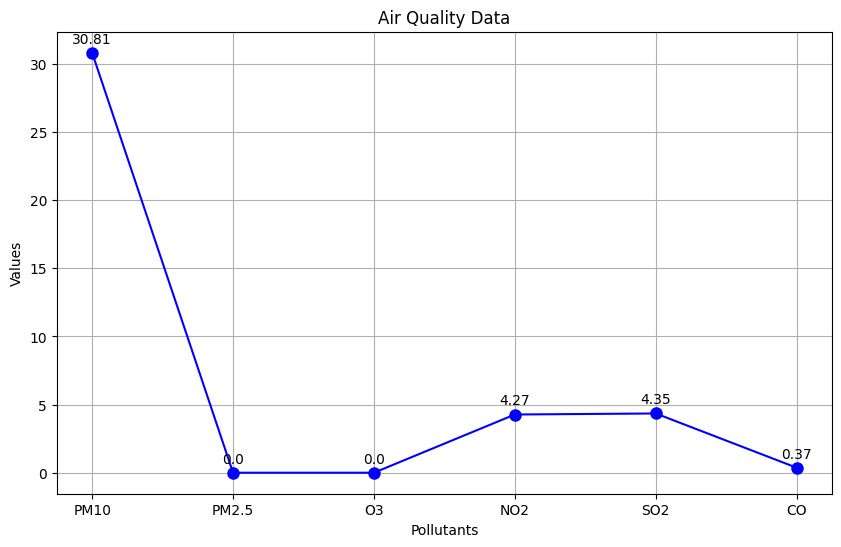

In [23]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Your Ambee API key
api_key = 'fbd599c427594d52c25b32f7726f5078b34f9cdacec21ec8dff79715bcedffda'

# Base URL for Ambee's API
base_url = 'https://api.ambeedata.com'

# Example endpoint for fetching air quality data
endpoint = '/latest/by-lat-lng'

# Parameters for the API request
params = {
    'lat': '11.04887',  # Example latitude for San Francisco, CA
    'lng': '77.03858'  # Example longitude for San Francisco, CA
}

# Headers including the API key
headers = {
    'x-api-key': api_key
}

# Making the API request
response = requests.get(base_url + endpoint, headers=headers, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    print('Data retrieved successfully:')

    # Ensure the response has the expected structure
    if 'stations' in data and len(data['stations']) > 0:
        air_quality = data['stations'][0]  # Adjust this line based on the actual response structure

        # Extract air quality data
        pollutants = ['PM10', 'PM2.5', 'O3', 'NO2', 'SO2', 'CO']
        values = [air_quality.get(pollutant, 0) for pollutant in pollutants]

        # Create a DataFrame with the air quality details
        df = pd.DataFrame({
            'Pollutant': pollutants,
            'Value': values,
            'Unit': ['µg/m³', 'µg/m³', 'ppb', 'ppb', 'ppb', 'ppb']
        })

        print(df)

        # Plotting the data using matplotlib
        fig, ax = plt.subplots(figsize=(10, 6))

        # Creating a line plot
        ax.plot(df['Pollutant'], df['Value'], marker='o', linestyle='-', color='b', markersize=8)

        # Adding labels and title
        ax.set_xlabel('Pollutants')
        ax.set_ylabel('Values')
        ax.set_title('Air Quality Data')

        # Adding value labels on top of the markers
        for i, value in enumerate(df['Value']):
            ax.text(i, value + 0.5, round(value, 2), ha='center', va='bottom')

        plt.grid(True)  # Enable grid for better visualization

        plt.show()
    else:
        print('Error: Unexpected data structure in API response.')
else:
    print(f'Failed to retrieve data. HTTP Status code: {response.status_code}')
    print('Response:', response.text)

Date & Time: 2024-06-17 09:00:00
Temperature: 33.88°C (Feels like: 39.89°C)
Pressure: 1009 hPa
Humidity: 55%
Wind: 6.11 m/s at 239°
Rain: 0 mm
Snow: 0 mm
---
Date & Time: 2024-06-17 12:00:00
Temperature: 32.56°C (Feels like: 37.45°C)
Pressure: 1008 hPa
Humidity: 57%
Wind: 6.64 m/s at 244°
Rain: 0 mm
Snow: 0 mm
---
Date & Time: 2024-06-17 15:00:00
Temperature: 28.62°C (Feels like: 31.91°C)
Pressure: 1009 hPa
Humidity: 70%
Wind: 6.01 m/s at 245°
Rain: 0 mm
Snow: 0 mm
---
Date & Time: 2024-06-17 18:00:00
Temperature: 25.02°C (Feels like: 25.69°C)
Pressure: 1009 hPa
Humidity: 81%
Wind: 5.7 m/s at 250°
Rain: 0.43 mm
Snow: 0 mm
---
Date & Time: 2024-06-17 21:00:00
Temperature: 24.22°C (Feels like: 24.86°C)
Pressure: 1008 hPa
Humidity: 83%
Wind: 5.35 m/s at 251°
Rain: 0 mm
Snow: 0 mm
---
Date & Time: 2024-06-18 00:00:00
Temperature: 23.93°C (Feels like: 24.6°C)
Pressure: 1008 hPa
Humidity: 85%
Wind: 4.53 m/s at 252°
Rain: 0 mm
Snow: 0 mm
---
Date & Time: 2024-06-18 03:00:00
Temperature: 26.28

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:187: RuntimeWarning: coroutine 'Server.serve' was never awaited
  for parent in list(self._parents.values()):


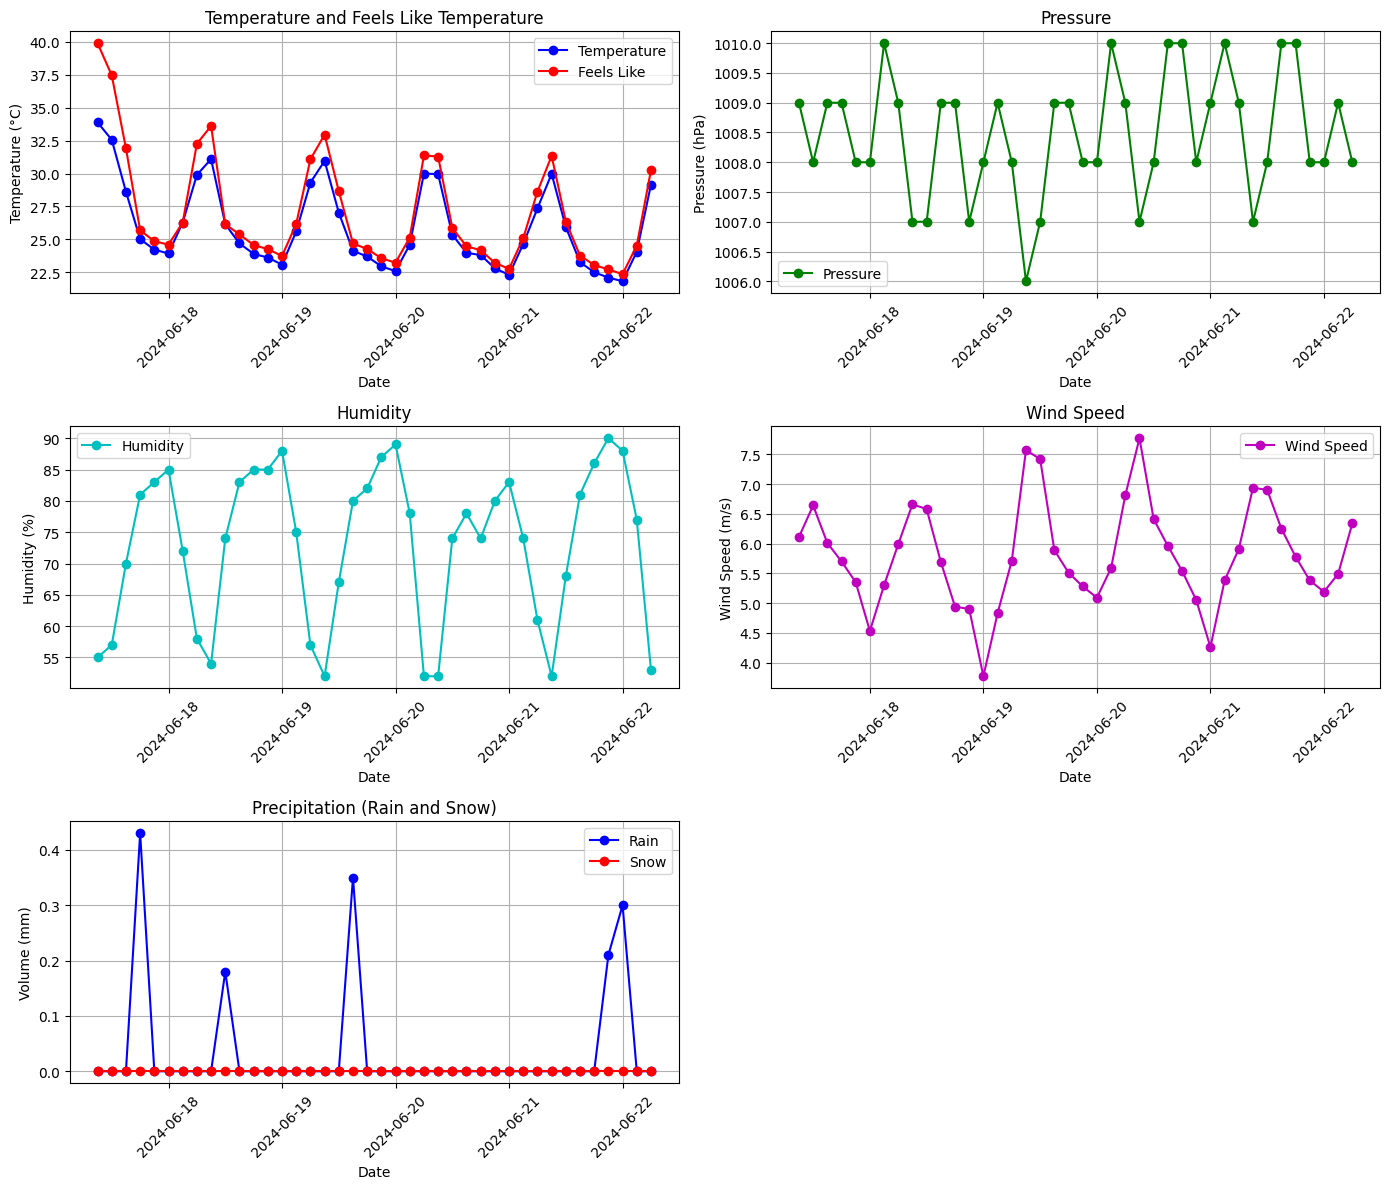

In [26]:
import requests
import matplotlib.pyplot as plt
from datetime import datetime

# Your OpenWeather API key
api_key = "5b435835d1e4d5743e63d4693b94d6f0"

# Example URL of the OpenWeather API endpoint for 5-day weather forecast data
city = "Coimbatore"
url = f"http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={api_key}&units=metric"  # units=metric for Celsius

# Making a GET request to the API endpoint
response = requests.get(url)

# Checking if the request was successful
if response.status_code == 200:
    # Parsing the response JSON
    data = response.json()

    # Extracting specific data from the JSON response
    forecasts = data['list']

    # Lists to store data for plotting
    dates = []
    temperatures = []
    feels_like_temps = []
    pressures = []
    humidities = []
    wind_speeds = []
    wind_directions = []
    rain_volumes = []
    snow_volumes = []

    # Extracting data for plotting
    for forecast in forecasts:
        # Extracting the date and time
        dt_txt = forecast['dt_txt']
        dates.append(datetime.strptime(dt_txt, '%Y-%m-%d %H:%M:%S'))

        # Extracting temperature, feels like temperature, pressure, humidity
        main = forecast['main']
        temperatures.append(main['temp'])
        feels_like_temps.append(main['feels_like'])
        pressures.append(main['pressure'])
        humidities.append(main['humidity'])

        # Extracting wind speed and direction
        wind = forecast['wind']
        wind_speeds.append(wind['speed'])
        wind_directions.append(wind['deg'])

        # Extracting precipitation data (rain and snow)
        rain = forecast.get('rain', {}).get('3h', 0)
        snow = forecast.get('snow', {}).get('3h', 0)
        rain_volumes.append(rain)
        snow_volumes.append(snow)

        # Print detailed forecast information
        print(f"Date & Time: {dt_txt}")
        print(f"Temperature: {main['temp']}°C (Feels like: {main['feels_like']}°C)")
        print(f"Pressure: {main['pressure']} hPa")
        print(f"Humidity: {main['humidity']}%")
        print(f"Wind: {wind['speed']} m/s at {wind['deg']}°")
        print(f"Rain: {rain} mm")
        print(f"Snow: {snow} mm")
        print("---")

    # Plotting temperature, feels like temperature, pressure, humidity, wind speed, precipitation
    plt.figure(figsize=(14, 12))

    # Temperature and Feels Like Temperature
    plt.subplot(3, 2, 1)
    plt.plot(dates, temperatures, label='Temperature', marker='o', linestyle='-', color='b')
    plt.plot(dates, feels_like_temps, label='Feels Like', marker='o', linestyle='-', color='r')
    plt.title('Temperature and Feels Like Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Pressure
    plt.subplot(3, 2, 2)
    plt.plot(dates, pressures, label='Pressure', marker='o', linestyle='-', color='g')
    plt.title('Pressure')
    plt.xlabel('Date')
    plt.ylabel('Pressure (hPa)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Humidity
    plt.subplot(3, 2, 3)
    plt.plot(dates, humidities, label='Humidity', marker='o', linestyle='-', color='c')
    plt.title('Humidity')
    plt.xlabel('Date')
    plt.ylabel('Humidity (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Wind Speed
    plt.subplot(3, 2, 4)
    plt.plot(dates, wind_speeds, label='Wind Speed', marker='o', linestyle='-', color='m')
    plt.title('Wind Speed')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (m/s)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Rain and Snow
    plt.subplot(3, 2, 5)
    plt.plot(dates, rain_volumes, label='Rain', marker='o', linestyle='-', color='b')
    plt.plot(dates, snow_volumes, label='Snow', marker='o', linestyle='-', color='r')
    plt.title('Precipitation (Rain and Snow)')
    plt.xlabel('Date')
    plt.ylabel('Volume (mm)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

else:
    print(f"Failed to retrieve data: {response.status_code} - {response.text}")
